In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Online Retail.csv")

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df_cleaned = df.dropna(subset=['Description','CustomerID'])

In [5]:
df_cleaned['Description'].nunique()

3896

In [6]:
df_cleaned['StockCode'].nunique()

3684

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [56]:
df_encoded = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

df_encoded = df_encoded.multiply(df_encoded, axis=0)

In [16]:
df_encoded = df_encoded.reset_index()

In [57]:
df_encoded

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Columns: 3897 entries, CustomerID to ZINC WIRE SWEETHEART LETTER TRAY
dtypes: float64(1), int64(3896)
memory usage: 130.0 MB


In [19]:
from sklearn.model_selection import train_test_split

In [21]:
df= df.dropna(subset=['Description','CustomerID'])

In [22]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
df['Products'] = df['Description'].astype(str)

C:\Users\Rajdeep\AppData\Local\Temp\ipykernel_13104\3033198830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Products'] = df['Description'].astype(str)


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Description'])

In [40]:
df_encoded

Description,CustomerID,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,12346.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12347.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4368,18281.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4369,18282.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4370,18283.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.fillna(0, inplace=True)  
df_encoded = df_encoded.set_index('CustomerID')  


In [58]:
df_encoded = df_encoded.applymap(lambda x: 1 if x > 1 else 0)

C:\Users\Rajdeep\AppData\Local\Temp\ipykernel_13104\631137646.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x > 1 else 0)


In [ ]:

non_binary_columns = df_encoded[(df_encoded != 0) & (df_encoded != 1)].any()
print(non_binary_columns[non_binary_columns].index)


Index([], dtype='object', name='Description')


0        36
1       106
2        63
3        68
4        62
       ... 
890       1
937       1
1074      1
1404      1
1769      1
Name: count, Length: 302, dtype: int64


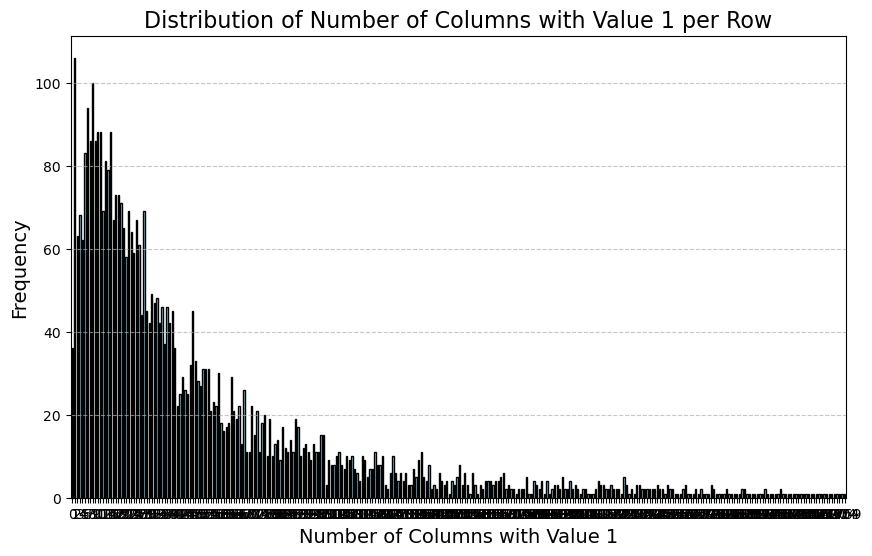

In [ ]:
row_sums = df_encoded.sum(axis=1)

distribution = row_sums.value_counts().sort_index()

print(distribution)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Columns with Value 1 per Row', fontsize=16)
plt.xlabel('Number of Columns with Value 1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:

row_sums = df_encoded.sum(axis=1)

df_filtered = df_encoded[row_sums > 20]

print(f"Number of rows with more than 10 ones: {df_filtered.shape[0]}")


Number of rows with more than 10 ones: 2746


Columns with the least number of occurrences (value 0):
Description
 I LOVE LONDON MINI RUCKSACK           0
2 DAISIES HAIR COMB                    0
3 BIRDS CANVAS SCREEN                  0
5 STRAND GLASS NECKLACE AMBER          0
60 GOLD AND SILVER FAIRY CAKE CASES    0
                                      ..
WHITE MURANO TWIST BRACELET            0
WHITE ROSEBUD  PEARL EARRINGS          0
WHITE STONE/CRYSTAL EARRINGS           0
WOOD AND GLASS MEDICINE CABINET        0
WOOLLY HAT SOCK GLOVE ADVENT STRING    0
Length: 123, dtype: int64


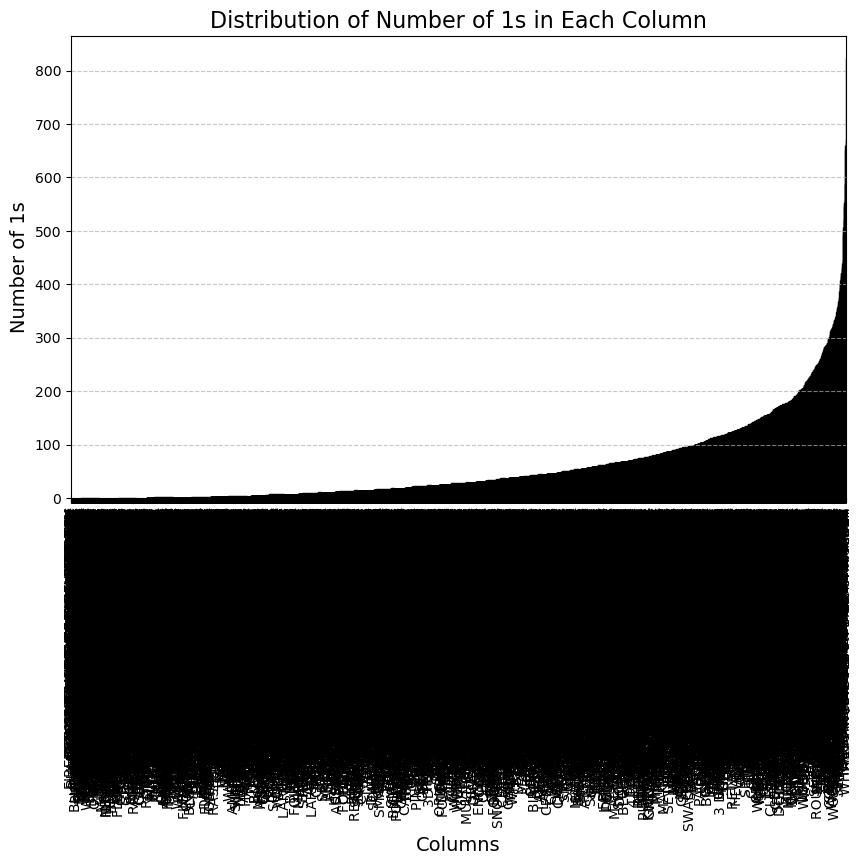

In [ ]:
import matplotlib.pyplot as plt

column_sums = df_encoded.sum(axis=0)

min_occurrences = column_sums.min()  
least_columns = column_sums[column_sums == min_occurrences]

print(f"Columns with the least number of occurrences (value {min_occurrences}):")
print(least_columns)

plt.figure(figsize=(10, 6))
column_sums.sort_values().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution of Number of 1s in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of 1s', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:

column_sums = df_filtered.sum(axis=0)


df_filtered_columns = df_filtered.loc[:, column_sums >= 50]

print(f"Number of columns after filtering: {df_filtered_columns.shape[1]}")


Number of columns after filtering: 1376


In [79]:
df_filtered_columns

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,YOU'RE CONFUSING ME METAL SIGN,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
print(df_filtered_columns[df_filtered_columns.index == 12348].index[0])

12348


In [ ]:
df_reset = df_filtered_columns.reset_index()

df_reset.rename(columns={'index': 'CustomerID'}, inplace=True)

In [93]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Columns: 1377 entries, CustomerID to ZINC WILLIE WINKIE  CANDLE STICK
dtypes: int32(1), int64(1376)
memory usage: 28.8 MB


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(df_reset.drop(columns=['CustomerID']))

def user_based_recommendation(user_id, df_reset, user_similarity, top_n=5):
   
    if user_id not in df_reset['CustomerID'].values:
        raise ValueError(f"User ID {user_id} not found in the data.")
    
    user_index = df_reset.index[df_reset['CustomerID'] == user_id][0]
    
    similar_users = user_similarity[user_index]
    
    similar_user_indices = similar_users.argsort()[-(top_n + 1):-1][::-1]
    
    recommended_items = []
    for index in similar_user_indices:
        similar_user_purchases = df_reset.iloc[index, 1:]  
        user_purchases = df_reset.iloc[user_index, 1:]     
        for col, value in similar_user_purchases.items():
            if value == 1 and user_purchases[col] == 0:  
                recommended_items.append(col)
    
    return list(set(recommended_items))[:top_n]  


user_id = 12348  
recommended_items = user_based_recommendation(user_id, df_reset, user_similarity)
print(f"Recommended items for user {user_id}: {recommended_items}")



Recommended items for user 12348: ['SET OF 6 RIBBONS VINTAGE CHRISTMAS', 'LUNCH BAG SPACEBOY DESIGN ', 'RAINY LADIES BIRTHDAY CARD', 'TRAVEL CARD WALLET TRANSPORT', 'REX CASH+CARRY JUMBO SHOPPER']


In [97]:
df[df['CustomerID']==12348]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Products
34083,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,12/16/2010 19:09,0.55,12348,Finland,72 SWEETHEART FAIRY CAKE CASES
34084,539318,22951,60 CAKE CASES DOLLY GIRL DESIGN,72,12/16/2010 19:09,0.55,12348,Finland,60 CAKE CASES DOLLY GIRL DESIGN
34085,539318,84991,60 TEATIME FAIRY CAKE CASES,24,12/16/2010 19:09,0.55,12348,Finland,60 TEATIME FAIRY CAKE CASES
34086,539318,84991,60 TEATIME FAIRY CAKE CASES,120,12/16/2010 19:09,0.42,12348,Finland,60 TEATIME FAIRY CAKE CASES
34087,539318,21213,PACK OF 72 SKULL CAKE CASES,24,12/16/2010 19:09,0.55,12348,Finland,PACK OF 72 SKULL CAKE CASES
34088,539318,21213,PACK OF 72 SKULL CAKE CASES,120,12/16/2010 19:09,0.42,12348,Finland,PACK OF 72 SKULL CAKE CASES
34089,539318,22616,PACK OF 12 LONDON TISSUES,72,12/16/2010 19:09,0.29,12348,Finland,PACK OF 12 LONDON TISSUES
34090,539318,21981,PACK OF 12 WOODLAND TISSUES,144,12/16/2010 19:09,0.29,12348,Finland,PACK OF 12 WOODLAND TISSUES
34091,539318,21982,PACK OF 12 SUKI TISSUES,144,12/16/2010 19:09,0.29,12348,Finland,PACK OF 12 SUKI TISSUES
34092,539318,21725,SWEETIES STICKERS,48,12/16/2010 19:09,0.85,12348,Finland,SWEETIES STICKERS
